Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Interpretability is crucial when it comes to making models that deal with human subjects, one example being justice algorithms of any sort. While it may not matter how a decision is made for traffic lights patterns that alleviate traffic (as long as they are performing reasonably better than alternative methods), when it comes to topics such as the justice system, it is not only the outcome, but the reasoning behind it which is important (this is why we have lawyers!); a 'black-box' algorithm, such as a random forest, will not provide this rational, so decision trees would be a prefered model, even if some accuracy is sacrificed in the process.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Predicting traffic at bus stops at certain hours to help optimize bus times and volumes could be an example where interpreability is less important - people generally care more about the system running smoothly than they do the reasoning behind it running smoothly. That said, there could still be some legitimate frustration, if say, an under-used stop was eliminated from the system, so there should be some method of checking and complimenting any machine learning models, but it is less crucial that these models be explicitly interpretable than, say, in the justice system.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Once you start with a random forest classifier, it's quite easy to increase interpretability (especially with Scikit-learn's 'treeinterpreter' function. This works by "decomposing each prediction into bias and feature contribution components$^{1}$," allowing for easy interpretation of the relative importance of factors determining the output.

$^{1}$ Source: https://github.com/andosa/treeinterpreter

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [234]:
import pandas as pd
import numpy as np

In [235]:
from __future__ import print_function, division
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [14]:
df['MPG'].value_counts()

bad     15
good     5
Name: MPG, dtype: int64

The most common MPG value is 'bad' with 15 (out of 20) cars having this value.

In [8]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [252]:
def print_discrete_gains(df):
    print('{:10s} {:10} {:6} {:6} {:6} {:6} {}'.format('Attr.','Category', 'Good Y',
                                                       'Bad Y','Good N','Bad N',
                                                       'Info Gain'))
    for i in df.columns:
        for j in df[i].unique():  #Unique Categories
            if i in ['HP', 'MPG']:
                break
            else:
                goodY = len(df[df[i] == j][df[df[i] == j]['MPG']=='good'])
                badY = len(df[df[i] == j][df[df[i] == j]['MPG']=='bad'])
                goodN = len(df[df[i] != j][df[df[i] != j]['MPG']=='good'])
                badN = len(df[df[i] != j][df[df[i] != j]['MPG']=='bad'])
                info_gain = InformationGain(goodY, badY, goodN, badN)
                print('{:10s} {:10} {:^6} {:^6} {:^6} {:^6} {:.5f}'.format(i, str(j),
                                                                           str(goodY), str(badY),
                                                                           str(goodN), str(badN),
                                                                           info_gain))
                
print_discrete_gains(df)

Attr.     Category   Good Y Bad Y  Good N Bad N  Info Gain
cylinders  4            5      4      0      11   0.36529
cylinders  6            0      6      5      9    0.15308
cylinders  8            0      5      5      10   0.12256
weight     light        3      3      2      12   0.09711
weight     medium       2      6      3      9    0.00000
weight     weighty      0      6      5      9    0.15308


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [253]:
def print_HP_gains(df):

    print('{:7s} {:8} {:6} {:6} {:6} {:6} {}'.format('Attr.', '>HP', 'Good Y','Bad Y',
                                                     'Good N','Bad N', 'Info Gain'))

    vals = sorted(df['HP'].unique())
    midpoints = [np.mean((vals[i], vals[i+1])) for i in range(len(vals) - 1)]

    for i in midpoints:
        goodY = len(df[df['HP'] > i][df[df['HP'] > i]['MPG']=='good'])
        badY = len(df[df['HP'] > i][df[df['HP'] > i]['MPG']=='bad'])
        goodN = len(df[df['HP'] < i][df[df['HP'] < i]['MPG']=='good'])
        badN = len(df[df['HP'] < i][df[df['HP'] < i]['MPG']=='bad'])
        info_gain = InformationGain(goodY, badY, goodN, badN)
        print('{:7s} {:8} {:^6} {:^6} {:^6} {:^6} {:.5f}'.format('HP',str(i), str(goodY), 
                                                                 str(badY), str(goodN), 
                                                                 str(badN), info_gain))
        
print_HP_gains(df)

Attr.   >HP      Good Y Bad Y  Good N Bad N  Info Gain
HP      70.0       4      15     1      0    0.10591
HP      78.0       3      15     2      0    0.22626
HP      83.0       2      15     3      0    0.36710
HP      87.0       2      14     3      1    0.21417
HP      89.5       1      14     4      1    0.36578
HP      91.0       1      13     4      2    0.27593
HP      92.5       0      13     5      2    0.50919
HP      93.5       0      12     5      3    0.42950
HP      94.5       0      11     5      4    0.36529
HP      97.5       0      8      5      7    0.22336
HP      105.0      0      6      5      9    0.15308
HP      124.5      0      5      5      10   0.12256
HP      142.0      0      4      5      11   0.09445
HP      157.5      0      3      5      12   0.06839
HP      172.5      0      2      5      13   0.04411
HP      182.5      0      1      5      14   0.02138


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

The best binary split of the data occurs at 'HP' > 92.5 (this has the highest information gain of all of the possible splits). Of the two nodes created by the split, only those < 92.5 would need further partitioning (which would be done by a similar processs of identifying the largest information gain in the subset), because there is a mix of good and bad MPG vehicles identified in this node (while there is clear separation at > 92.5).

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [258]:
below_92_5 = df[df['HP'] < 92.5]

print_discrete_gains(below_92_5)
print('\n')
print_HP_gains(below_92_5)

Attr.     Category   Good Y Bad Y  Good N Bad N  Info Gain
cylinders  4            5      0      0      2    0.86312
cylinders  6            0      2      5      0    0.86312
weight     light        3      0      2      2    0.29169
weight     medium       2      2      3      0    0.29169


Attr.   >HP      Good Y Bad Y  Good N Bad N  Info Gain
HP      70.0       4      2      1      0    0.07601
HP      78.0       3      2      2      0    0.16958
HP      83.0       2      2      3      0    0.29169
HP      87.0       2      1      3      1    0.00598
HP      89.5       1      1      4      1    0.06174
HP      91.0       1      0      4      2    0.07601


Here, we find that the best information gain occurs at the number of cylinders, with a perfect split occuring between 4 and 6. Therefore, we do not need any further steps (given the data we have) to perfectly classify the data with our decision tree.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

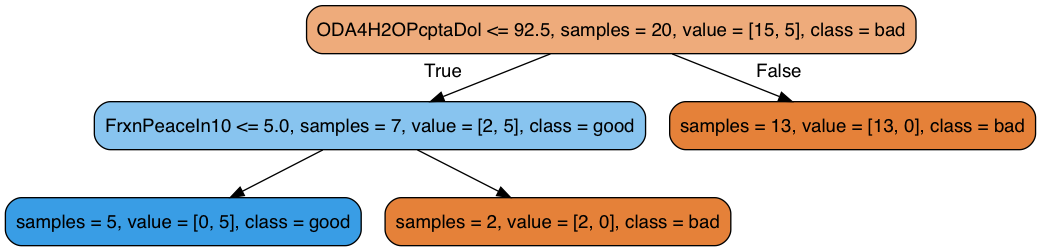

In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
import pydotplus

# Convert all columns to numerical values
for_picture = df.copy()
weights = {'light':1, 'medium': 2, 'weighty': 3}
for_picture['weight'].replace(weights, inplace=True)

y = for_picture.loc[:,'MPG']
X = for_picture.loc[:,'cylinders':'weight']

dt = DecisionTreeClassifier(max_leaf_nodes=3)
dt.fit(X, y)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
#print (thestring)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

**Description:** The above tree was created with Scikit-learn and a visual library, and arrives at an identical solution to what we derived earlier. The first split determines whether a car's HP is <= 92.5; for those less than 92.5, there is a further split between 4 and 6 cylinder engines (Scikit-learn splits these using '<= 5' cylinders). This then gives us a perfect split into good and bad MPG categories.

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

**Bad**,8,70,light

**Bad**,6,113,medium

**Good**,4,83,weighty

**Bad**,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [131]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data=data.dropna()

y = data.loc[:,'BurdenOfDisease']
X = data.loc[:,'FrxnPeaceIn10':'FemaleLtrcyRate']

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_leaf_nodes=3)
dt.fit(X_train, y_train)

# in sample accuracy
print ('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 0.6057692307692307
Out of sample accuracy: 0.6538461538461539


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

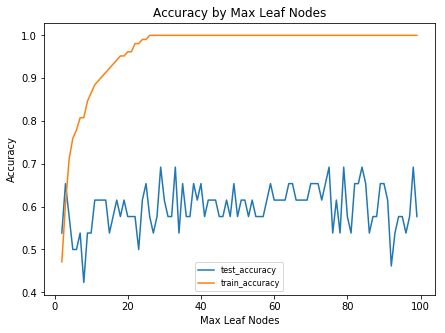

In [185]:
import matplotlib.pylab as plt

max_len = 100
accuracy_test = []
accuracy_train = []
for i in range(2, max_len):
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train, y_train)
    accuracy_test.append(dt.score(X_test,y_test))
    accuracy_train.append(dt.score(X_train,y_train))

plt.figure(figsize=(7,5))
plt.plot(range(2,max_len), accuracy_test, label='test_accuracy')
plt.plot(range(2,max_len), accuracy_train, label='train_accuracy')
plt.legend(loc=0, fontsize=8)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy by Max Leaf Nodes")
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [198]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(2, 100)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid)
rs = gr.fit(X_train, y_train)
print(rs.best_params_)

{'max_depth': 44}


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [200]:
import graphviz

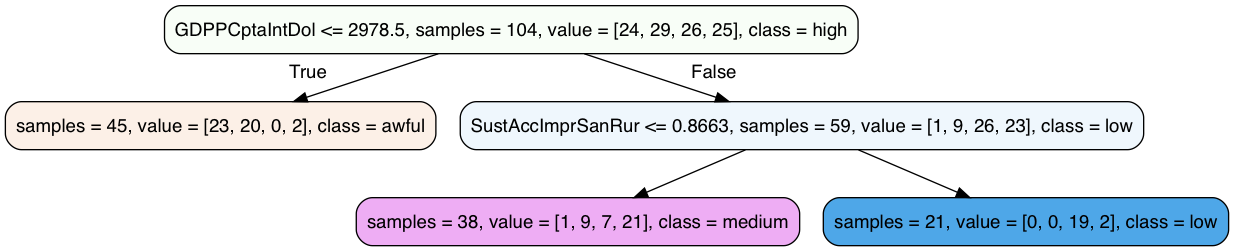

In [207]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

dt = DecisionTreeClassifier(max_leaf_nodes=3)
dt.fit(X_train, y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
#print (thestring)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print (rf.score(X_test,y_test))

0.6153846153846154


In [219]:
param_grid = {'max_depth':range(1,10)}
rf=RandomForestClassifier(n_jobs=-1, max_leaf_nodes=10) #n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print (rs.best_params_)

{'max_depth': 1}


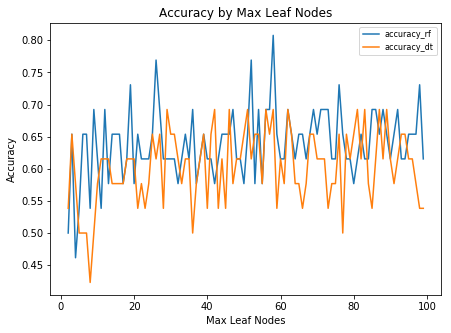

In [233]:
max_len = 100
accuracy_rf = []
accuracy_dt = []
for i in range(2, max_len):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1, max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train, y_train)
    accuracy_rf.append(rf.score(X_test,y_test))
    accuracy_dt.append(dt.score(X_test,y_test))

plt.figure(figsize=(7,5))
plt.plot(range(2,max_len), accuracy_rf, label='accuracy_rf')
plt.plot(range(2,max_len), accuracy_dt, label='accuracy_dt')
plt.legend(loc=0, fontsize=8)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy by Max Leaf Nodes")
plt.show()

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.